# Small Image Classification Using Convolutional Neural Network (CNN)

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#### Let's plot some images to see what they are

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[int(y[index])])

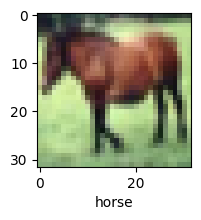

In [15]:
plot_sample(X_train, y_train,7)

#### Normalizing the training data

In [17]:
X_train = X_train / 255
X_test = X_test / 255

### Build simple artificial neural network for image classification

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid'),
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3092 - loss: 1.9166
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4204 - loss: 1.6479
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4530 - loss: 1.5507
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4815 - loss: 1.4786
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4946 - loss: 1.4320
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5138 - loss: 1.3807
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5267 - loss: 1.3537
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5394 - loss: 1.3101
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5492 - loss: 1.2828
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5628 - loss: 1.2474


In [20]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5135 - loss: 1.3682


[1.372396469116211, 0.5115000009536743]

### Classification Report

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.60      0.57      1000
           1       0.72      0.51      0.59      1000
           2       0.56      0.20      0.29      1000
           3       0.42      0.15      0.22      1000
           4       0.37      0.61      0.46      1000
           5       0.41      0.48      0.45      1000
           6       0.60      0.53      0.57      1000
           7       0.54      0.66      0.59      1000
           8       0.53      0.75      0.62      1000
           9       0.56      0.63      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.49     10000
weighted avg       0.53      0.51      0.49     10000



### Build a convolutional neural network to train our images

In [43]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [45]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3764 - loss: 1.7079
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5989 - loss: 1.1416
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6525 - loss: 1.0040
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6814 - loss: 0.9134
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7143 - loss: 0.8285
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7282 - loss: 0.7930
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7492 - loss: 0.7263
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7604 - loss: 0.6884
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7769 - loss: 0.6458
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7875 - loss: 0.6099
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7983 - loss: 0.5741
Epoch 12/30
1563/1563 ━━━━━━━━

In [48]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6737 - loss: 1.7709


[1.8028759956359863, 0.671999990940094]

In [49]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.0785235e-02, 6.0044968e-05, 1.5406193e-01, 7.2937042e-01,
        2.9864229e-02, 4.1035705e-04, 6.5446727e-02, 1.0762836e-06,
        3.3002724e-08, 2.1720665e-09],
       [9.4007834e-07, 2.9894057e-01, 9.0514753e-08, 1.3529211e-20,
        8.1964526e-24, 5.8586716e-19, 1.1704715e-13, 5.3276516e-26,
        7.0105845e-01, 2.7567844e-14],
       [3.1445143e-04, 9.7032833e-01, 9.8266106e-10, 1.3562347e-06,
        4.0379167e-08, 2.1844107e-10, 2.4660983e-08, 9.8144686e-05,
        2.9070288e-02, 1.8737165e-04],
       [9.9998128e-01, 7.3173363e-11, 6.8967471e-11, 3.7391318e-12,
        1.7066152e-15, 5.1851416e-17, 2.1053157e-11, 6.5391330e-14,
        1.8711356e-05, 1.2688911e-17],
       [2.4038676e-16, 7.1526877e-14, 1.9393545e-05, 1.7986938e-03,
        8.3778187e-04, 2.8316415e-06, 9.9734122e-01, 6.2862489e-14,
        7.3003000e-15, 8.7325051e-14]], dtype=float32)

In [50]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [51]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

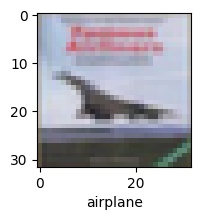

In [52]:
plot_sample(X_test, y_test,3)

In [53]:
classes[y_classes[3]]

'airplane'